<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M2L2_Developing_an_MVP_mobile_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing an MVP mobile app

[PPT M2L2 ENG](https://docs.google.com/presentation/d/1sMfJFMMEFs-KGf1Zen3aRXihxcWQP54aP6_lbbkqjJ8/edit?usp=sharing)

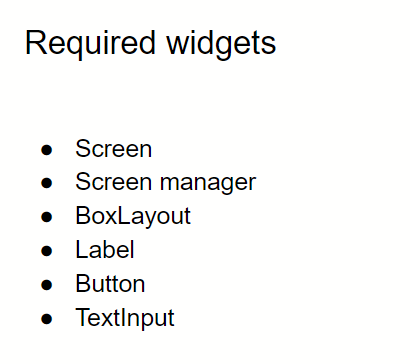

Main Screen

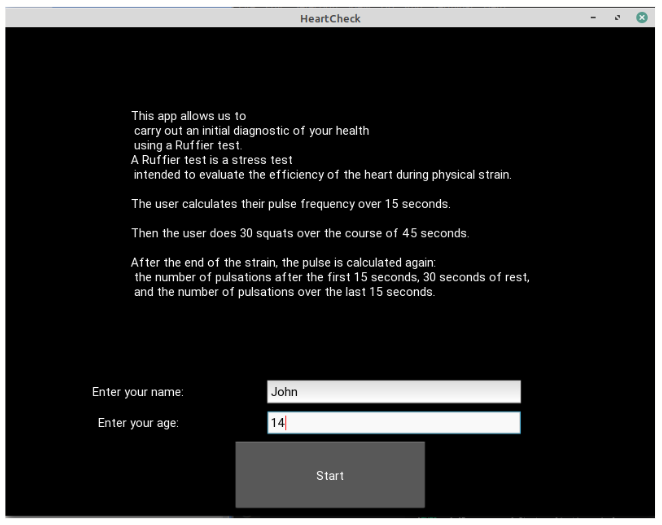

Pulse Screen

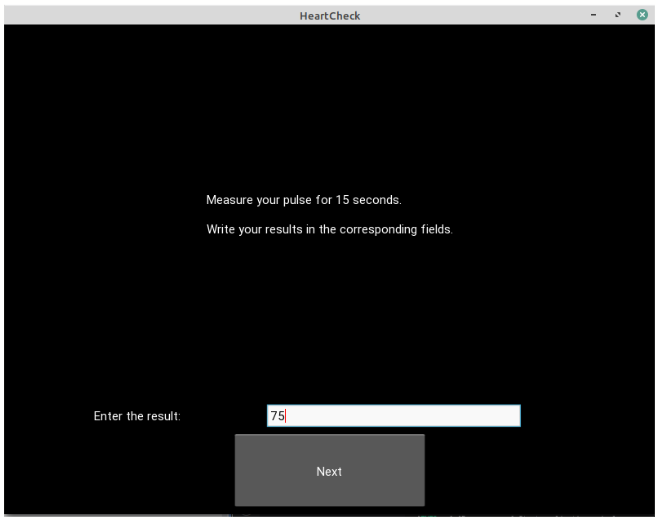

Squat Screen

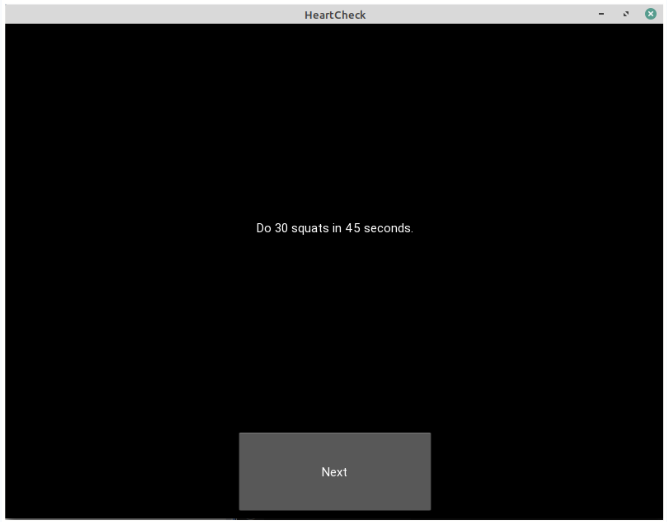

Pulse 2 Screen

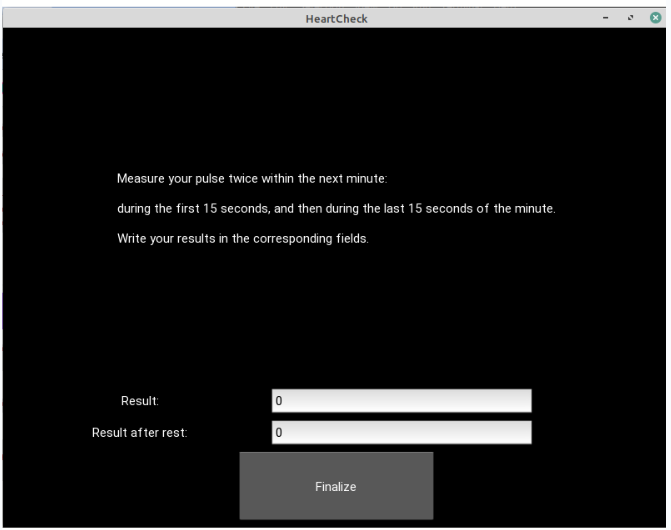

Result Screen

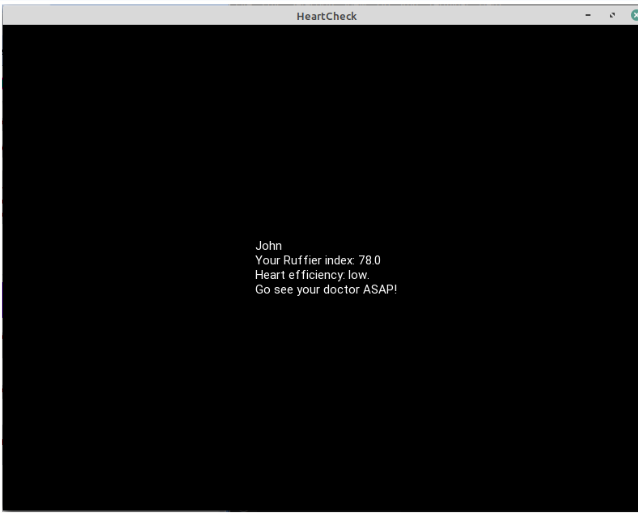

# main_app.py

In [ ]:
# write your app here
from kivy.app import App
from kivy.uix.screenmanager import Screen, ScreenManager
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.label import Label
from kivy.uix.button import Button
from kivy.uix.textinput import TextInput

import instructions
import ruffier

global name
# global age
global pulse_start
global pulse_before_rest
global pulse_after_rest


# from instructions import *

# class ScreenButton(Button):
#     def __init__(self, screen, direction='right', goal='main', **kwargs):
#         super().__init__(**kwargs)
#         self.screen = screen
#         self.direction = direction
#         self.goal = goal

#     def on_press(self):
#         self.screen.manager.transition.direction = self.direction
#         self.screen.manager.current = self.goal

class MainScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # layout
        v_layout = BoxLayout(orientation='vertical', padding=10, spacing=10, size_hint_x=.8, pos_hint={'center_x':0.5})
        h_layout1 = BoxLayout(size_hint_y=.07)
        h_layout2 = BoxLayout(size_hint_y=.07)

        # widget
        name_txt = Label(text='Enter your name:', halign='left')
        age_txt = Label(text='Enter your age', halign='left')

        self.in_name = TextInput(multiline=False)
        self.in_age = TextInput(multiline=False)

        self.btn_start = Button(text='Start', size_hint=(.4, .2), pos_hint={'center_x':0.5})
        self.btn_start.on_press = self.next

        txt = Label(text=instructions.txt_instruction)

        # horizontal
        h_layout1.add_widget(name_txt)
        h_layout1.add_widget(self.in_name)

        h_layout2.add_widget(age_txt)
        h_layout2.add_widget(self.in_age)

        # vertical
        v_layout.add_widget(txt)
        v_layout.add_widget(h_layout1)
        v_layout.add_widget(h_layout2)
        v_layout.add_widget(self.btn_start)

        self.add_widget(v_layout)

    def next(self):
        global name
        global age
        name = self.in_name.text
        age = int(self.in_age.text)
        self.manager.current = 'pulse'

class PulseScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        v_layout = BoxLayout(orientation='vertical', padding=10, spacing=10, size_hint_x=.8, pos_hint={'center_x':0.5})
        h_layout = BoxLayout(size_hint_y=.07)

        txt = Label(text=instructions.txt_test1)
        pulse_txt = Label(text='Enter the result:')
        self.in_pulse = TextInput(multiline=False)

        self.btn_next = Button(text='Next', size_hint=(.4, .2), pos_hint={'center_x':0.5})
        self.btn_next.on_press = self.next

        h_layout.add_widget(pulse_txt)
        h_layout.add_widget(self.in_pulse)

        v_layout.add_widget(txt)
        v_layout.add_widget(h_layout)
        v_layout.add_widget(self.btn_next)

        self.add_widget(v_layout)

    def next(self):
        global pulse_start
        pulse_start = int(self.in_pulse.text)
        self.manager.current = 'squat'

class SquatScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        v_layout = BoxLayout(orientation='vertical', padding=10, spacing=10, size_hint_x=.8, pos_hint={'center_x':0.5})

        txt = Label(text=instructions.txt_sits)
        self.btn_next = Button(text='Next', size_hint=(.4, .2), pos_hint={'center_x':0.5})
        self.btn_next.on_press = self.next

        v_layout.add_widget(txt)
        v_layout.add_widget(self.btn_next)

        self.add_widget(v_layout)

    def next(self):
        self.manager.current = 'pulse2'

class Pulse2Screen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # layout
        v_layout = BoxLayout(orientation='vertical', padding=10, spacing=10, size_hint_x=.8, pos_hint={'center_x':0.5})
        h_layout1 = BoxLayout(size_hint_y=.07)
        h_layout2 = BoxLayout(size_hint_y=.07)

        # widget
        txt1 = Label(text='Result:', halign='left')
        txt2 = Label(text='Result after rest:', halign='left')

        self.res_bef = TextInput(multiline=False)
        self.res_af = TextInput(multiline=False)

        self.btn_final = Button(text='Finalize', size_hint=(.4, .2), pos_hint={'center_x':0.5})
        self.btn_final.on_press = self.next

        txt = Label(text=instructions.txt_test3)

        # horizontal
        h_layout1.add_widget(txt1)
        h_layout1.add_widget(self.res_bef)

        h_layout2.add_widget(txt2)
        h_layout2.add_widget(self.res_af)

        # vertical
        v_layout.add_widget(txt)
        v_layout.add_widget(h_layout1)
        v_layout.add_widget(h_layout2)
        v_layout.add_widget(self.btn_final)

        self.add_widget(v_layout)

    def next(self):
        global pulse_before_rest
        global pulse_after_rest

        pulse_before_rest = int(self.res_bef.text)
        pulse_after_rest = int(self.res_af.text)

        self.manager.current = 'result'


class ResultScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        v_layout = BoxLayout(orientation='vertical', size_hint_y=.3, pos_hint={'center_y':.5})

        self.txt_name = Label(text='', halign='left')
        # self.txt_name.text = name

        # ruffier = Label(text='Your ruffier index:', halign='left')
        # heart = Label(text='Heart efficiency:', halign='left')
        # reccomendation = Label(text='see doctor', halign='left')

        v_layout.add_widget(self.txt_name)
        # v_layout.add_widget(ruffier)
        # v_layout.add_widget(heart)
        # v_layout.add_widget(reccomendation)

        self.add_widget(v_layout)
        self.on_enter = self.before

    def before(self):
        global name
        self.txt_name.text = name + '\n' + ruffier.test(pulse_start, pulse_before_rest, pulse_after_rest, age)

class HeartCheck(App):
    def build(self):
        sm = ScreenManager()
        sm.add_widget(MainScreen(name='main'))
        sm.add_widget(PulseScreen(name='pulse'))
        sm.add_widget(SquatScreen(name='squat'))
        sm.add_widget(Pulse2Screen(name='pulse2'))
        sm.add_widget(ResultScreen(name='result'))

        return sm

app = HeartCheck()
app.run()

# ruffier.py

In [ ]:
''' Module for calculating the results of Ruffier tests.

The sum of the three tries at pulse readings (before strain, right after strain, and after a short break)
ideally, there should be no more than 200 beats per minute.
We propose that the children measure their pulse for 15 seconds,
and find the result of beats per minute by multiplying by 4:
   S = 4 * (P1 + P2 + P3)
The further the result is from the ideal 200 beats, the worse it is.
Traditionally, tables are given by values divided by 10.

Ruffier index
   IR = (S - 200) / 10
is evaluated corresponding to age according to the table:
        7-8             9-10                11-12               13-14               15+ (only for adolescents!)

perfect     < 6.5           < 5                 < 3.5               < 2                 < 0.5
good    >= 6.5 и < 12   >= 5 и < 10.5       >= 3.5 и < 9        >= 2 и < 7.5        >= 0.5 и < 6
satisfactory  >= 12 и < 17    >= 10.5 и < 15.5    >= 9 и < 14         >= 7.5 и < 12.5     >= 6 и < 11
weak  >= 17 и < 21    >= 15.5 и < 19.5    >= 14 и < 18        >= 12.5 и < 16.5    >= 11 и < 15
unsatisfactory   >= 21           >= 19.5             >= 18               >= 16.5             >= 15

the result “unsatisfactory” is 4 from the result “weak” for all ages,
“weak” is separated from “satisfactory” by 5, and “good” from “satisfactory” by 5.5

so we will write a function ruffier_result(r_index, level) which will produce
the calculated Ruffier index and level “unsatisfactory” for the tested age, and produce a result

'''
# here the lines which produce the result are given
txt_index = "Your Ruffier index: "
txt_workheart = "Heart efficiency: "
txt_nodata = '''
there is no data for that age'''
txt_res = []
txt_res.append('''low.
Go see your doctor ASAP!''')
txt_res.append('''satisfactory.
Go see your doctor!''')
txt_res.append('''average.
It might be worth additional tests at the doctor.''')
txt_res.append('''
higher than average''')
txt_res.append('''
high''')

def ruffier_index(P1, P2, P3):
   ''' it returns the index value according to the three pulse calculations for comparison with the table'''
   result = (4 * (P1 + P2 + P3) - 200) / 10
   return result

def neud_level(age):
   ''' the options with an age of less than 7 and with adults have to be processed separately,
   here we select the level “unsatisfactory” only within the table:
   for the age of 7, “unsatisfactory” is an index of 21, then onwards every 2 years it decreases by 1.5 until the level of 15 at age 15–16 '''
   norm_age = (min(age, 15)-7) // 2
   result = 21 - norm_age*1.5
   return result


def ruffier_result(r_index, level):
   ''' the function obtains a Ruffier index and interprets it,
   we return the readiness level: a number from 0 to 4
   (the higher the readiness level, the better).  '''
   # if r_index >= level:
   if r_index >= level:
      return 0

   level = level - 4

   if r_index >= level:
      return 1

   level = level - 5

   if r_index >= level:
      return 2

   level = level - 5.5

   if r_index >= level:
      return 3

   return 4


def test(P1, P2, P3, age):
   ''' this function can be used from outside the module for calculating the Ruffier index.
   We return the ready texts that just need to be written in the necessary place
   We use the constants used at the beginning of this module for texts. '''
   if age < 7:
       return (txt_index + "0", txt_nodata) # this is a mystery beyond this test
   else:
       ruff_index = ruffier_index(P1, P2, P3) # calculation
       result = txt_res[ruffier_result(ruff_index, neud_level(age))] # the interpretation and conversion of the numeric preparation level into text data
       res = txt_index + str(ruff_index) + '\n' + txt_workheart + result
       return res


# instructions.py

In [ ]:
txt_instruction = '''
This app allows us to \n carry out an initial diagnostic of your health \n using a Ruffier test.
A Ruffier test is a stress test\n intended to evaluate the efficiency of the heart during physical strain.\n
The user calculates their pulse frequency over 15 seconds.\n
Then the user does 30 squats over the course of 45 seconds.\n
After the end of the strain, the pulse is calculated again: \n the number of pulsations after the first 15 seconds, 30 seconds of rest,\n and the number of pulsations over the last 15 seconds.\n'''

txt_test1 = '''Measure your pulse for 15 seconds.\n
Write your results in the corresponding fields.'''

txt_test2 = '''Do 30 squats in 45 seconds.\n
Press the button “Start” to launch the squat counter.
Squat at the speed of the counter.'''

txt_test3 = '''Measure your pulse twice within the next minute:\n
during the first 15 seconds, and then during the last 15 seconds of the minute.\n
Write your results in the corresponding fields.'''

txt_sits = 'Do 30 squats in 45 seconds.'

